## Loading FooDD Dataset in Jupyter for Inspection

This notebook was used to convert 3828 JPEG files into NumPy arrays. Each array was stored in a dictionary with the key corresponding to the class of image it was taken from. 

In [36]:
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import sys

In [37]:
# Absolute path to the dataset
FooDD_path = "/Users/harrymckinney/Desktop/Capstone/FooDD"

In [38]:
# List of folders in the dataset
food_folders = glob.glob(os.path.join(FooDD_path, '*'))

# check the folder names
#food_folders

## Resize Images and Convert to NumPy Arrays

Keeps the aspect ratio the same. Need to change this if you want images all the same size.

In [22]:
def convert_with_resize(img_path, new_width=224, new_height=224):
    
    orig_img = Image.open(img_path)
    
    new_size = (new_width,new_height)
    centering = (0.25,0.5)

    # Resize the image
    resized_image = ImageOps.fit(orig_img, new_size, centering = centering)

    # Convert resized image to NumPy array
    resized_img_arr = np.asarray(resized_image)
    
    return resized_img_arr

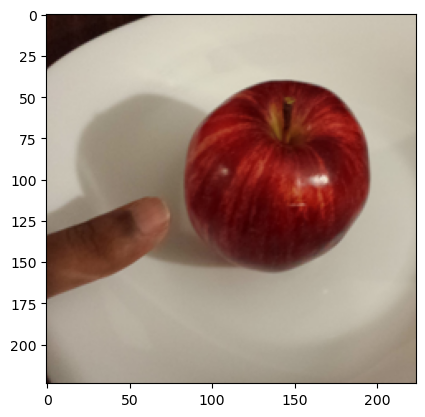

In [34]:
rand_path = "/Users/harrymckinney/Desktop/Capstone/FooDD/Apple/2-samsung-S4-Dark Environment/2 (40).jpg"
img_arr = convert_with_resize(rand_path)
plt.imshow(img_arr)

## Convert Entire Class Folder to NumPy Arrays

In [29]:
def ims_to_arrs(item):
    
    '''
    Inputs: item - a list of absolute paths to the images for an item.
            
    Outputs: food_arrs - a list of NumPy arrays for all images for an item.
             item_name - a string for the name of the item.
    '''
    
    #Initialize list for image file paths
    food_paths = []

    #Get the name of the item
    item_name = item.split("/")[-1]

    #Get paths of files in folder
    food_paths = glob.glob(os.path.join(item, '**',"*.[jJ][pP][gG]"), recursive=True)

    for path in food_paths:

        try:
            #Call the function that makes an array of resized (smaller) image
            img_arr = convert_with_resize(path)
            food_arrs.append(img_arr)
            
        #don't want to error out just give me the corrupted file path if its bad
        except Exception as e:
            print(f"Error processing image from {path}: {e}")

    print(f"Retrieved all images from {item_name} folder.")
        
    return food_arrs, item_name

This is the loop that calls `ims_to_arrs` function for each folder:

In [30]:
food_ims = dict()

for folder in food_folders:
    
    #Initialize empty list to store all the arrays (images) for an item
    food_arrs = []
    
    #Call function to convert images from a folder into a list of arrays
    food_arrs, item_name = ims_to_arrs(folder)
    
    #Assign the list of arrays to a dictionary with the key as the item name
    food_ims[item_name] = food_arrs
    
    #Update status for long runtimes
    print(f"Saved all images for {item_name} into food_ims dictionary.")
    
    #Clear the arrays and name for the next loop to free up memory
    del food_arrs, item_name
    

Retrieved all images from Apple folder.
Saved all images for Apple into food_ims dictionary.
Retrieved all images from Egg folder.
Saved all images for Egg into food_ims dictionary.
Retrieved all images from Grape & Apple folder.
Saved all images for Grape & Apple into food_ims dictionary.
Retrieved all images from Onion folder.
Saved all images for Onion into food_ims dictionary.
Retrieved all images from Bean folder.
Saved all images for Bean into food_ims dictionary.
Retrieved all images from Mixed folder.
Saved all images for Mixed into food_ims dictionary.
Retrieved all images from Cucumber folder.
Saved all images for Cucumber into food_ims dictionary.
Retrieved all images from Cheese folder.
Saved all images for Cheese into food_ims dictionary.
Retrieved all images from Watermelon folder.
Saved all images for Watermelon into food_ims dictionary.
Retrieved all images from Pasta folder.
Saved all images for Pasta into food_ims dictionary.
Retrieved all images from Net images folde

In [32]:
total_arrs = 0
total_folders = 0

for key in food_ims.keys():
    print(f"There are {len(food_ims[key])} arrays for the {key} folder")
    total_arrs += len(food_ims[key])
    total_folders += 1

print(f"\nThere are {total_arrs} total arrays.")
print(f"\nThere are {total_folders} folders in total.")


There are 0 total arrays.

There are 0 folders in total.


In [ ]:
food_ims["Beans"] = food_ims["Bean"]
del food_ims["Bean"]

In [ ]:
food_ims["Kiwi"] = food_ims["Qiwi"]
del food_ims["Qiwi"]

In [ ]:
food_ims["Grapes"] = food_ims["Grape"]
del food_ims["Grape"]

In [ ]:
del food_ims["Mixed"], food_ims["Net images"], food_ims["Grape & Apple"], food_ims["sauce"]

In [ ]:
food_ims.keys()

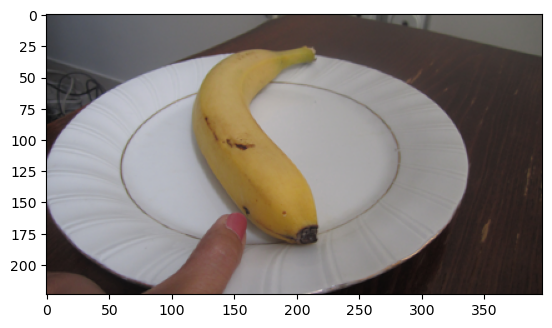

In [7]:
#Check a random image from the loaded dataset
inspect_img = food_ims["Banana"][13]
plt.imshow(inspect_img)

In [8]:
inspect_img.shape

(224, 397, 3)

## Save the Files for EDA, Preprocessing and Modelling

In [ ]:
saved_path = "/Users/harrymckinney/Desktop/SavedArrays/FoodArrays.npz"

In [ ]:
np.savez(saved_path, **data_dict)